# Take Home Exam

## Instructions:
* Make sure that you run all code cells that are included in this notebook.
* I will deduct points in **half-point steps** in the following cases:
    * Your code does not work.
    * You are not answering the question (Read carefully).
    * Your code is slow or inefficient.
    * You do not explain why you are doing what you are doing.
    * Clean **unnecessary** elements before submission.
    * **Check the rubric on Camino for this assignment!**
    
**The deadline is Saturday, February 10, 2018, 11:59PM**.

**I am not available on Saturday and have only limited access to my email. If you have questions or issues, make sure you adress them on Friday. **

## Overview

In [562]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [563]:
%matplotlib inline

In [564]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [565]:
cd = pd.read_csv('complications.csv', dtype=str).rename(columns=lambda x: x.strip())

This dataset contains complications in U.S. hospitals. Each observation represents the number of complications and the 30-day death rate for a specific complication in a specific hospital.

The columns are as follows:

In [566]:
cd.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'ZIP Code',
       'County Name', 'Phone Number', 'Year', 'Measure ID', 'Measure Name',
       'Denominator', 'Score', 'Lower Estimate', 'Higher Estimate'],
      dtype='object')

| Column Name | Description|
|-------------|------------|
|Provider ID | Unique ID of the hospital |
|Hospital Name| Name of the hospital|
|Address| Address of the hospital|
|City| Name of the city the hospital is in |
|ZIP Code | Postal code of the hospital|
|County Name | Name of the county the hospital is in|
|Phone Number | Phone number of the hospital |
|Year | The year in which the complications were recorded|
|Measure ID | Code for the complication |
|Measure Name | Name of the complication|
|Denominator| Number of underlying medical procedures|
|Score | Estimate for number of serious complications |
|Lower Estimate | Lower boundary of score|
|Higher Estimate | Upper boundary of score|

A quick overview of the dataset:

In [567]:
cd.describe()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate
count,272788,272788,272788,272788,272788,272626,272788,272788,272788,272788,272788,272788,272788,272788
unique,4746,5119,4915,2874,4368,1526,5028,6,26,26,23771,6373,8690,11699
top,040114,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,CHICAGO,76104,LOS ANGELES,6104022273,2013,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,26.0,0.06,0.0,0.06
freq,89,710,378,1957,353,5421,178,58668,24942,24942,1435,2947,23907,2897


A sample of the dataset:

In [568]:
cd.sample(5, random_state=1234).head()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate
22678,050222,SHARP CHULA VISTA MEDICAL CENTER,751 MEDICAL CENTER COURT,CHULA VISTA,91911,SAN DIEGO,6195025800,2016,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,474.0,14.3,12.1,16.8
22088,050191,ST MARY MEDICAL CENTER,1050 LINDEN AVE,LONG BEACH,90813,LOS ANGELES,5624919000,2012,PSI_14_POSTOP_DEHIS,A wound that splits open after surgery on the...,102.0,1.78,0.0,3.64
111295,201309,MAYO REGIONAL HOSPITAL,897 WEST MAIN STREET,DOVER FOXCROFT,04426,PISCATAQUIS,2075644251,2014,MORT_30_STK,Death rate for stroke patients,43.0,14.1,10.2,18.9
44865,100012,LEE MEMORIAL HOSPITAL,2776 CLEVELAND AVE,FORT MYERS,33901,LEE,2393321111,2012,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,971.0,10.6,8.9,12.5
208974,390194,BLUE MOUNTAIN HOSPITAL-GNADEN HUETTEN CAMPUS,211 NORTH 12TH STREET,LEHIGHTON,18235,CARBON,6073771300,2016,MORT_30_STK,Death rate for stroke patients,72.0,15.7,11.7,20.8


# Transform relevant columns

All columns in the dataset are of type `str` (to preserve the ZIP code information). For **five** columns, str is the wrong type. Change the columns and explain why you changed which column.

Transforming Score,Denominator,Year,Lower Estimate,Higher Estimate columns of the above dataset to Numeric datatype.
Score & Denominator - we need to compute ratios using these and calculations cannot be done on string datatypes.
Lower Estimate and Higher Estimates relate to Score column,thus converting it into Numeric datatype.
Year- aggregate functions cannot be used on str datatypes.

In [571]:
cd[['Year','Score','Denominator','Lower Estimate','Higher Estimate']] = cd[['Year','Score','Denominator','Lower Estimate','Higher Estimate']].apply(pd.to_numeric)

# Create a ratio between the score and the denominator

Create a new column in the dataset that contains the ratio value.

Created a new column in the existing DataSet and computing the ratio.Showing the top 5 observations

In [572]:
cd['Ratio'] = cd['Score']/cd['Denominator']
cd.head()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate,Ratio
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,3347938701,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,356.0000,3.7000,2.5000,5.5000,0.0104
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,3347938701,2012,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,347.0000,3.8000,2.5500,5.6000,0.0110
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,3347938701,2013,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,341.6667,3.8000,2.5667,5.5667,0.0111
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,3347938701,2014,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,335.3333,3.9667,2.7000,5.7333,0.0118
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,3347938701,2015,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,334.0000,4.0000,2.7500,5.7500,0.0120


# Create an overview of the ratio for deathly complications

0. **Be careful when you identify 'deathly' complications and make sure that you catch all of them.**
1. Create the overview (Make sure that the overview is understandable to everyone.)
2. Choose an appropriate measure to aggregate the data. **Ignore that the data is for multiple years**.
2. Sort with the highest ratio on top.

Assuming that Deathly complication can be determined from the measures which have keywords 'Death','Mortality' and 'Deaths' and then grouping the data based on Measure ID and determining the ratio for each measure.Craeting a dataset which has data about the Deathly complications.

,Score,Denominator,ratio_measure
Measure ID,,,
PSI_4_SURG_COMP,580801.4400,1154668.0400,0.5030
MORT_30_STK,248335.5000,3005991.0000,0.0826
MORT_30_AMI,210667.2000,2877792.0000,0.0732
MORT_30_PN,348649.5000,7048887.0000,0.0495
MORT_30_HF,266497.2000,5859984.0000,0.0455
MORT_30_COPD,173553.6000,4505727.0000,0.0385
MORT_30_CABG,10145.7000,409293.0000,0.0248


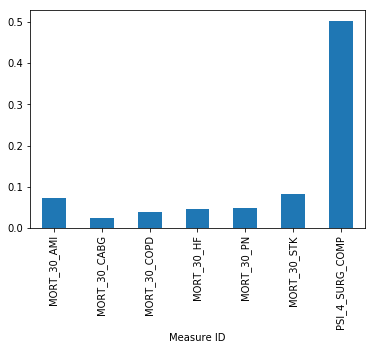

In [284]:
#Deathly complications:
cb_overview = cd[(cd['Measure Name'].str.contains('Death')) | (cd['Measure Name'].str.contains('Mortality')) | (cd['Measure Name'].str.contains('Deaths'))]
ratio1 = cb_overview.groupby(['Measure ID'])['Score','Denominator'].sum()
ratio1['ratio_measure'] = ratio1['Score']/ratio1['Denominator']
ratio1.sort_values(by=['ratio_measure'],ascending=False)
import matplotlib.pyplot as plt
ratio1['ratio_measure'].plot(kind = 'bar')

Looking at the above graph, we can safely conclude that complications realted to 'Deaths among Patients with Serious Treatable Complications' has the highest ratio.

# Identify the five safest hospitals

Return a **list** with the hospitals that have, on average, the lowest rate of deadly complications. **Be careful when you identify 'deathly' complications.** (Again, ignore that the dataset covers multiple years).

Here, I am grouping the data based on Hospital Name and then calculating the mean of ratio and taking the 5 smallest values in a list

In [633]:
df = (cb_overview.groupby('Hospital Name')[['Ratio']].mean()).nsmallest(5,'Ratio').reset_index()
df['Hospital Name'].tolist()

['UNIVERITY OF MD BALTO WASHINGTON  MEDICAL CENTER',
 'NEW YORK-PRESBYTERIAN HOSPITAL',
 'NORTON HOSPITALS, INC',
 'SAN JUAN VA MEDICAL CENTER',
 'FLORIDA HOSPITAL']

# Augment the dataset with information about the state

Read the file `geo-data.csv` into an object `zip_codes`. **Make sure that you read all columns as string.** ([Link](https://github.com/scpike/us-state-county-zip))

In [577]:
zip_codes = pd.read_csv('geo-data.csv', dtype=str)
zip_codes.head()

,state_fips,state,state_abbr,zipcode,county,city
0,1,Alabama,AL,35004,St. Clair,Acmar
1,1,Alabama,AL,35005,Jefferson,Adamsville
2,1,Alabama,AL,35006,Jefferson,Adger
3,1,Alabama,AL,35007,Shelby,Keystone
4,1,Alabama,AL,35010,Tallapoosa,New site


This file contains information about the relationship of zip codes, counties, and U.S. states. 

In [288]:
zip_codes.columns

Index(['state_fips', 'state', 'state_abbr', 'zipcode', 'county', 'city'], dtype='object')

| Column Name | Description|
|-------------|------------|
|state_fips | FIPS code for the state |
|state| Name of the state|
|state_abbr| Abbreviation of the state|
|zipcode | Postal code|
|county | County name|
|city | City name  |

1. Combine the dataset on complications with the dateset on zip codes.
2. Explain why you chose the column that used to combine the datasets.
3. **Do not worry, not all states will be matched.**

Merging the 2 datasets by using Zip Code and City as a composite Key.Using city or zipcode alone will not be enough because a city can have multiple zip codes.However, by doing so , there are some columns which have NaN values as they do not get a match in the cd dataset.Creating a new Dataset which has the columns from both the datasets.Showing some random values in the result:

In [580]:
cd['City'] = cd['City'].str.lower() #Converting the values of city in lower case
zip_codes['city'] = zip_codes['city'].str.lower()
merged_dataset = cd.merge(zip_codes, left_on=['ZIP Code','City'], right_on=['zipcode','city'], how='left')
merged_dataset.sample(5, random_state=1234).head()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,...,Score,Lower Estimate,Higher Estimate,Ratio,state_fips,state,state_abbr,zipcode,county,city
22678,050222,SHARP CHULA VISTA MEDICAL CENTER,751 MEDICAL CENTER COURT,chula vista,91911,SAN DIEGO,6195025800,2016,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,...,14.3000,12.1000,16.8000,0.0302,6,California,CA,91911,San Diego,chula vista
22088,050191,ST MARY MEDICAL CENTER,1050 LINDEN AVE,long beach,90813,LOS ANGELES,5624919000,2012,PSI_14_POSTOP_DEHIS,A wound that splits open after surgery on the...,...,1.7800,0.0000,3.6400,0.0175,6,California,CA,90813,Los Angeles,long beach
111295,201309,MAYO REGIONAL HOSPITAL,897 WEST MAIN STREET,dover foxcroft,04426,PISCATAQUIS,2075644251,2014,MORT_30_STK,Death rate for stroke patients,...,14.1000,10.2000,18.9000,0.3279,NaN,NaN,NaN,NaN,NaN,NaN
44865,100012,LEE MEMORIAL HOSPITAL,2776 CLEVELAND AVE,fort myers,33901,LEE,2393321111,2012,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,...,10.6000,8.9000,12.5000,0.0109,12,Florida,FL,33901,Lee,fort myers
208974,390194,BLUE MOUNTAIN HOSPITAL-GNADEN HUETTEN CAMPUS,211 NORTH 12TH STREET,lehighton,18235,CARBON,6073771300,2016,MORT_30_STK,Death rate for stroke patients,...,15.7000,11.7000,20.8000,0.2181,NaN,NaN,NaN,NaN,NaN,NaN


# Create an overview of the complications per U.S. state

* Return a sorted list with the overall complication rate per state. 
* Ignore that the data is for multiple years. 
* Focus on the **best** ten states.

For showing the best 10 states with overall complication rate , I have grouped the data based on state and calculated the mean of Ratio and then took the smallest 10 values.Plotting the same, clearly visualizes that Delaware has the lowest complication rate.

,Ratio
state,
Delaware,0.0634
Maryland,0.0700
Florida,0.0769
District of columbia,0.0777
Virginia,0.0848
Pennsylvania,0.0877
New york,0.0906
South carolina,0.0921
North carolina,0.0923


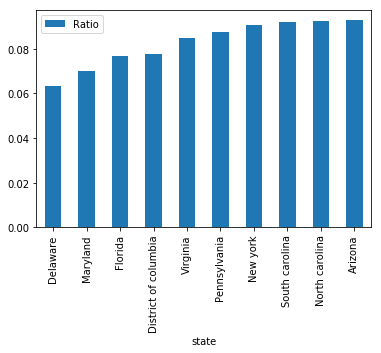

In [582]:
df = (merged_dataset.groupby(['state'])[['Ratio']].mean()).nsmallest(10,'Ratio')
df
df.plot(kind = 'bar')

# Create an overview of the change in complications across U.S. states

* Focus on the deadly complications only.
* Calculate the change as follows: **(average rate for last year in dataset - average rate for first year in dataset)/(average rate for first year in dataset)**

Filtering the Joined data based on Deathly combinations.
Then grouping the data based on State and Year and calculating the mean of ratios.For calculating the change I need to have the first and last  values of the group.In order to get the first and last value of the group, I have applied first and last functions.But since this works on groupby objects, I have done the grouping again.And then calculating the change as (Last value-First Value)/First Value.

In [587]:
merged_overview = merged_dataset[(merged_dataset['Measure Name'].str.contains('Death')) | (merged_dataset['Measure Name'].str.contains('Mortality')) | (merged_dataset['Measure Name'].str.contains('Deaths'))]
grpd_data = merged_overview.groupby(['state','Year'])[['Ratio']].mean()
grpd_object = grpd_data.groupby(['state'])
((grpd_object.last() - grpd_object.first())/grpd_object.first()).sort_values('Ratio').head()

,Ratio
state,
Delaware,-0.1874
Alaska,-0.1839
Nevada,-0.1598
Arizona,-0.1365
South carolina,-0.1346


Which state has improved the most?

Delaware has removed with 18.74% reduction in deathly complications

Which state has the worst development?

Wyoming with 14.71% increase in deathly complications

# Bonus

Which state has the worst development for 'Deaths among Patients with Serious Treatable Complications after Surgery'?

Grouping the data based on State and Year and calculating the mean of ratios.For calculating the change I need to have the first and last values of the group.In order to get the first and last value of the group, I have applied first and last functions.But since this works on groupby objects, I have done the grouping again.And then calculating the change as (Last value-First Value)/First Value.

In [585]:
dataset = merged_overview[merged_overview['Measure Name'] == 'Deaths among Patients with Serious Treatable Complications after Surgery']
state_yr_grpd= dataset.groupby(['state','Year'])[['Ratio']].mean()
state_grpd = state_yr_grpd.groupby(['state'])
((state_grpd.last() - state_grpd.first())/state_grpd.first()).sort_values('Ratio').tail()

,Ratio
state,
Kansas,0.0226
Michigan,0.0301
District of columbia,0.0553
Arkansas,0.1841
Utah,0.2102


Utah has the worst development for 'Deaths among Patients with Serious Treatable Complications after Surgery'